## GARCH

Aleksandr K.

The Generalized Autoregressive Conditional Heteroscedasticity (**GARCH**) model is a statistical model used to model and forecast time series data that exhibit volatility clustering, which means that periods of high volatility tend to be followed by periods of high volatility, and periods of low volatility tend to be followed by periods of low volatility.

The GARCH model is an extension of the *Autoregressive Conditional Heteroscedasticity* (ARCH) model, which was introduced by Robert Engle in 1982. The ARCH model assumes that the conditional variance of a time series is a function of past squared residuals (i.e., the residuals of the model's predictions), while the GARCH model allows for the conditional variance to depend on both past squared residuals and past conditional variances.

The GARCH model is typically specified as follows:

* Mean equation: This specifies the conditional mean of the time series, which can be a simple mean or ARIMA model.

* Volatility equation: This specifies the conditional variance of the time series, which is modeled as a function of past squared residuals and past conditional variances. The GARCH model typically includes two components:

  * Autoregressive component (ARCH): This captures the lagged squared residuals, denoted as ARCH(p), where 'p' represents the order of the autoregressive component.

  * Moving average component (GARCH): This captures the lagged conditional variances, denoted as GARCH(q), where 'q' represents the order of the moving average component.

The GARCH model is estimated using maximum likelihood estimation (MLE) or other estimation techniques, and the estimated parameters are used to generate forecasts of the conditional variance, which can be used for various purposes, including risk management, option pricing, and portfolio optimization.

The GARCH model is widely used in finance and economics for managing financial risk, as it can capture the time-varying volatility patterns commonly observed in financial time series data. By modeling the conditional variance, the GARCH model allows for the estimation of risk metrics such as Value-at-Risk (VaR) and Expected Shortfall (ES), which are important for risk management in various financial applications.

### GARCH in Python using the 'arch' library

In [2]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.5/920.5 kB 13.8 MB/s eta 0:00:00


Iteration:      1,   Func. Count:      5,   Neg. LLF: 523206027.5015988
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1406.3394216138686
Iteration:      3,   Func. Count:     16,   Neg. LLF: 1406.728582568385
Iteration:      4,   Func. Count:     22,   Neg. LLF: 1494.5592599408205
Iteration:      5,   Func. Count:     27,   Neg. LLF: 1406.2162181964495
Iteration:      6,   Func. Count:     31,   Neg. LLF: 1406.2135430974154
Iteration:      7,   Func. Count:     35,   Neg. LLF: 1406.2134685503231
Iteration:      8,   Func. Count:     39,   Neg. LLF: 1406.2134547296782
Iteration:      9,   Func. Count:     42,   Neg. LLF: 1406.2134547318956
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1406.2134547296782
            Iterations: 9
            Function evaluations: 42
            Gradient evaluations: 9


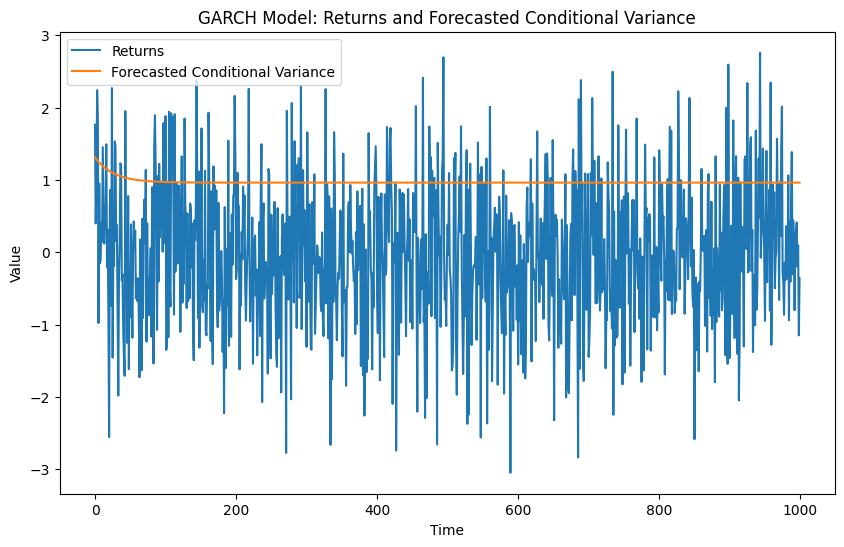

Value-at-Risk (VaR) at 95.0% confidence level: -1.6332
Expected Shortfall (ES) at 95.0% confidence level: -2.0710


In [4]:
import numpy as np
import pandas as pd
from arch import arch_model
from arch.__future__ import reindexing
import matplotlib.pyplot as plt

# Generate synthetic financial data
np.random.seed(0)
returns = np.random.normal(0, 1, size=1000)

# Fit GARCH model
model = arch_model(returns, mean='Zero', vol='GARCH', p=1, q=1)
result = model.fit()

# Get model parameters
omega = result.params['omega']
alpha = result.params['alpha[1]']
beta = result.params['beta[1]']

# Generate forecast of conditional variance
forecast = result.forecast(start=0)

# Plot actual returns and forecasted conditional variance
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Returns')
plt.plot(forecast.variance.values, label='Forecasted Conditional Variance')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('GARCH Model: Returns and Forecasted Conditional Variance')
plt.show()

# Calculate Value-at-Risk (VaR) at 95% confidence level
confidence_level = 0.05
VaR = np.percentile(returns, 100 * confidence_level)

# Calculate Expected Shortfall (ES) at 95% confidence level
ES = returns[returns < VaR].mean()

# Print risk metrics
print(f'Value-at-Risk (VaR) at {100 * (1-confidence_level)}% confidence level: {VaR:.4f}')
print(f'Expected Shortfall (ES) at {100 * (1-confidence_level)}% confidence level: {ES:.4f}')


In this example, we generate synthetic financial data (random normal returns) and fit a GARCH(1,1) model to the data using the *arch* library. We then extract the model parameters, including the omega (intercept), alpha (autoregressive) and beta (moving average) coefficients. We use the model to generate forecasts of the conditional variance, which represents the estimated volatility of the returns over time. We plot the actual returns and the forecasted conditional variance for visualization.

Finally, we calculate risk metrics such as Value-at-Risk (*VaR*) and Expected Shortfall (*ES*) at a 95% confidence level using the model. VaR represents the maximum expected loss at a given confidence level, while ES represents the average expected loss beyond VaR. These risk metrics can be used for managing financial risk, such as setting risk limits, monitoring portfolio risk, and making risk-informed investment decisions.

**Note**: Please note that the GARCH model is a statistical tool for estimating conditional volatility and is not a guarantee of future performance. It is important to use it in conjunction with other risk management techniques and consider the limitations and assumptions of the model when interpreting the results.


#### Value-at-Risk (VaR) and Expected Shortfall (ES)

Value-at-Risk (VaR) and Expected Shortfall (ES) are risk metrics commonly used in risk management to quantify the potential losses in a financial portfolio or investment due to market volatility.

**Value-at-Risk (VaR):** VaR is a measure that estimates the maximum potential loss a portfolio may incur over a specified time horizon at a given confidence level. It is expressed as a dollar amount or percentage of the portfolio value. For example, a 95% VaR of 1 million dollars over a one-day time horizon means that there is a 5% chance of the portfolio losing more than 1 million dollars in one day.

**Expected Shortfall (ES):** ES, also known as Conditional Value-at-Risk (**CVaR**), is a risk metric that estimates the average of the worst-case losses beyond the VaR level. It is expressed as a dollar amount or percentage of the portfolio value. For example, a 95% ES of 1 million dollars over a one-day time horizon means that, on average, the portfolio is expected to lose 1 million dollars or more on the worst 5% of days.

Both VaR and ES are used by risk managers and portfolio managers to assess and manage the downside risk of a portfolio. These metrics provide an estimate of the potential losses under adverse market conditions, which can help in setting risk limits, optimizing portfolios, and making informed investment decisions.

The GARCH model can be used to estimate the conditional variance of a time series, which can be used to calculate VaR and ES for managing financial risk. By incorporating time-varying volatility patterns, the GARCH model allows for more accurate estimation of risk metrics compared to traditional methods that assume constant volatility.

Here's an example of a Python code that uses real financial data to implement the GARCH model

[*********************100%***********************]  1 of 1 completed
Iteration:      1,   Func. Count:      5,   Neg. LLF: 2369.0597844928598
Iteration:      2,   Func. Count:     13,   Neg. LLF: -4462.788771184598
Iteration:      3,   Func. Count:     19,   Neg. LLF: -4657.181293087229
Iteration:      4,   Func. Count:     25,   Neg. LLF: -5007.3707909781715
Iteration:      5,   Func. Count:     30,   Neg. LLF: -5020.162475192464
Iteration:      6,   Func. Count:     34,   Neg. LLF: -5020.172528753874
Iteration:      7,   Func. Count:     38,   Neg. LLF: -5020.172272406909
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5020.172528754508
            Iterations: 7
            Function evaluations: 48
            Gradient evaluations: 7


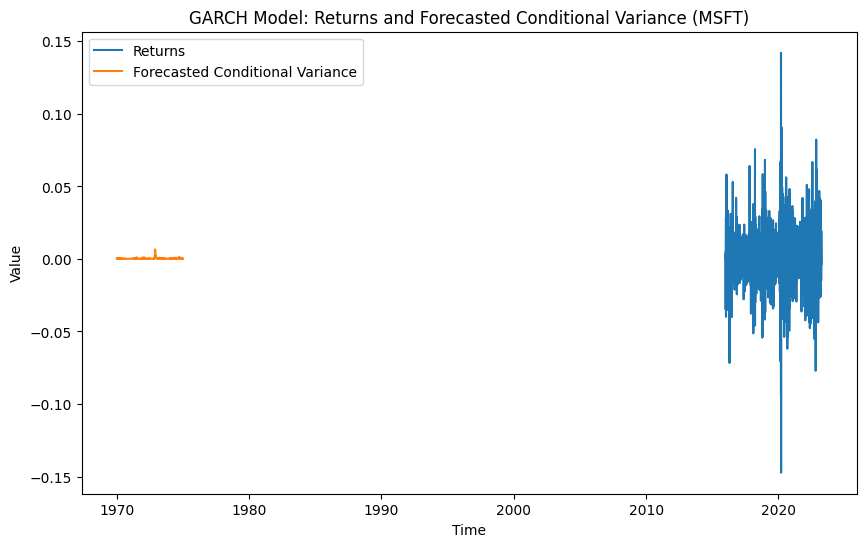

Value-at-Risk (VaR) at 95.0% confidence level: -0.0279
Expected Shortfall (ES) at 95.0% confidence level: -0.0405


In [12]:
import pandas as pd
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

# Download financial data
symbol = 'MSFT'  # stock symbol
start_date = '2015-01-01'
end_date = '2023-04-04'
df = yf.download(symbol, start=start_date, end=end_date, interval='1d')
#returns = df['Close'].pct_change().dropna()  # Calculate daily returns

# Fit GARCH model
model = arch_model(returns, mean='Zero', vol='GARCH', p=1, q=1, rescale=False)
result = model.fit()

# Get model parameters
omega = result.params['omega']
alpha = result.params['alpha[1]']
beta = result.params['beta[1]']

# Generate forecast of conditional variance
forecast = result.forecast(start=0)

# Plot actual returns and forecasted conditional variance
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Returns')
plt.plot(forecast.variance.values, label='Forecasted Conditional Variance')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('GARCH Model: Returns and Forecasted Conditional Variance (MSFT)')
plt.show()

# Calculate Value-at-Risk (VaR) at 95% confidence level
confidence_level = 0.05
VaR = returns.quantile(confidence_level)

# Calculate Expected Shortfall (ES) at 95% confidence level
ES = returns[returns < VaR].mean()

# Print risk metrics
print(f'Value-at-Risk (VaR) at {100 * (1-confidence_level)}% confidence level: {VaR:.4f}')
print(f'Expected Shortfall (ES) at {100 * (1-confidence_level)}% confidence level: {ES:.4f}')


Here we use the *yfinance* library to download historical stock price data for Microsoft (MSFT) from Yahoo Finance, and calculate the daily returns based on the closing prices. We then fit a GARCH(1,1) model to the returns data using the arch library. We extract the model parameters, generate forecasts of the conditional variance, and plot the actual returns and the forecasted conditional variance for visualization.

Finally, we calculate risk metrics including Value-at-Risk (VaR) and Expected Shortfall (ES) at a 95% confidence level using the model. It's important to interpret the results of the GARCH model in conjunction with other risk management techniques and consider the limitations and assumptions of the model in real-world applications.